# Problem 1
<p>
    In this problem we will use synthetic data sets to explore the bias-variance tradeoff
    incurred by using regularization.
</p>
<ul>
  <li> 
      <p>
           Generate data of the form:
           $ y = X\beta+ \epsilon $
      </p>
      <p>
          where X is an n x p matrix where n = 51, p = 50, and each $ X_{ij}  N(0, 1) $ Also, generate
          the noise according to i  N(0; 1=4). Let  be the all ones vector (for simplicity).
          By repeatedly doing this experiment and generating fresh data (fresh X, and y, and hence  {
          but make that you're not reseting your random seed!) but keeping  xed, you will estimate
          many different solutions, ^ . Estimate the mean and variance of ^ . Note that ^  is a vector,
          so for this exercise simply estimate the variance of a single component.
     </p>
  </li>
</ul>

In [59]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

## Part 1 Sampling

In [2]:
def createData():
    X = np.random.randn(51,50)
    beta = np.ones((50,1))
    epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
    y = np.matmul(X, beta) + epsilon
    psuedo_inv = np.linalg.inv(np.matmul(X.T, X))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X.T), epsilon) + beta
    return X, y, beta_hat, beta

In [117]:
def sampleData(n = 100):
    samples = []
    for i in range(n):
        X, y, beta_hat, beta = createData()
        samples.append(beta_hat[0])
    samples = np.array(samples)
    return samples

Mean of the sampling distribution is: 1.0479253600438736
Variance of the sampling distribution is: 0.059154888313569784


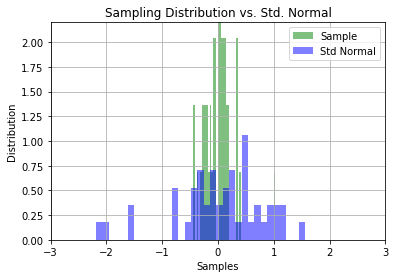

In [118]:
num_samples = 50
samples = sampleData(num_samples)
print("Mean of the sampling distribution is: {}".format(np.mean(samples)))
print("Variance of the sampling distribution is: {}".format(np.var(samples)))
num_bins = 50
_ = plt.hist(samples - np.mean(samples), num_bins, normed=1, facecolor='green', alpha = 0.5, label='Sample')
_ = plt.hist(np.random.randn(num_samples), num_bins, normed=1, facecolor='blue', alpha=0.5, label='Std Normal')
_ = plt.xlabel('Samples')
_ = plt.ylabel('Distribution')
_ = plt.title('Sampling Distribution vs. Std. Normal')
_ = plt.xlim([-3, 3])
_ = plt.ylim([0, 2.2])
_ = plt.legend()
_ = plt.grid(True)

Remark- note that sampling distribution was zero-meaned and normed.

## Part 2 Ridge Regression

In [44]:
# Sample a distribution and return the mean and var of the sample
def getSampleParams(n=100):
    beta_hats = []
    for i in range(n):
        X = np.random.randn(51,50)
        beta = np.ones((50,1))
        epsilon = np.random.normal(loc=0, scale=0.25, size=(51,1))
        y = np.matmul(X, beta) + epsilon
        model = Ridge(alpha=alpha)
        _ = model.fit(X,y)
        beta_hats.extend(model.coef_)
    
    beta_hats = np.array(beta_hats)
    # Beta hat shape is (100,50)
    mean = np.mean(beta_hats[:,0])
    var = np.var(beta_hats[:,0])
    return mean, var

In [46]:
# Get coefficients as lambda varies
alphas = [0.01, 0.1, 1, 10, 100]
means = []
variances = []
for alpha in alphas:
    mean, var = getSampleParams()
    means.append(mean)
    variances.append(var)
    

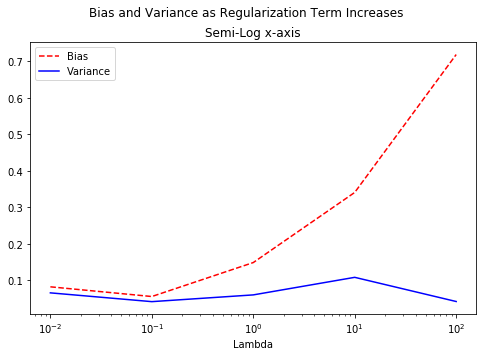

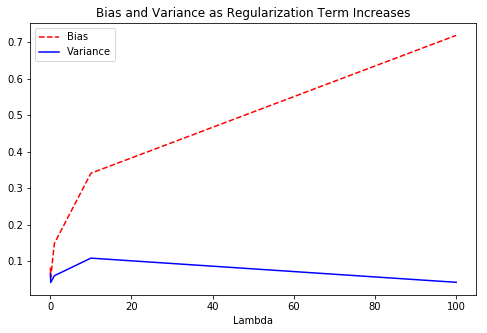

In [56]:
# Plot the results
bias = np.ones(5) - means
fig = plt.figure(figsize=(8,5))
_ = plt.semilogx(alphas, bias, color='red', linestyle='--', label='Bias')
_ = plt.semilogx(alphas, variances, color='blue', label='Variance')
_ = plt.xlabel('Lambda')
_ = plt.suptitle('Bias and Variance as Regularization Term Increases')
_ = plt.title('Semi-Log x-axis')
_ = plt.legend()

fig = plt.figure(figsize=(8,5))
_ = plt.plot(alphas, bias, color='red', linestyle='--', label='Bias')
_ = plt.plot(alphas, variances, color='blue', label='Variance')
_ = plt.xlabel('Lambda')
_ = plt.title('Bias and Variance as Regularization Term Increases')
_ = plt.legend()

Use ridge regression, i.e., L2 regularization. Vary the regularization coeffcient $\lambda = 0.01, 0.1, 1, 10, 100$ and repeat the above experiment. What do you observe? As you increase $\lambda $ is the model becoming more simple or more complex? As you increase $\lambda $ is performance becoming better or worse? Also compute LOOCV for each $\lambda $. How does the value of LOOCV, and in particular how it changes as $\lambda $ varies, compare with what you observe for the explicitly computed variance?

In [79]:
def scoreRidge(X_train, X_test, y_train, y_test, alpha):
    model = Ridge(alpha=alpha)
    _ = model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    score = mean_squared_error(y_test, y_hat)
    return score

In [83]:
# Create some data and perform LOOCV
X, y, beta_hat, beta = createData()
loo = LeaveOneOut()
num_splits = loo.get_n_splits(X)

alphas = [0.01, 0.1, 1, 10, 100]
scores = []
for alpha in alphas:
    score = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        score += float(scoreRidge(X_train, X_test, y_train, y_test, alpha))
    scores.append(score/num_splits)
scores = np.array(scores)

(5,)


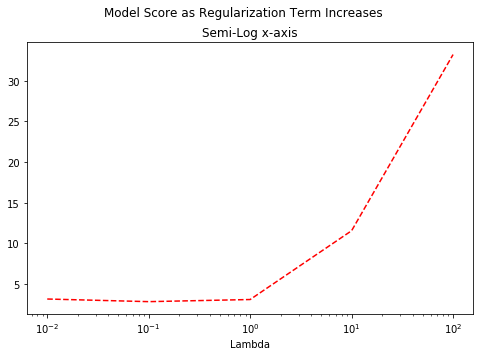

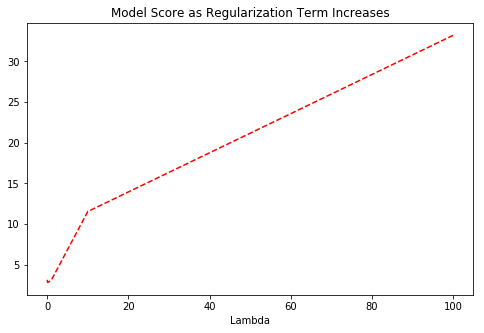

In [84]:
# Plot the results
bias = np.ones(5) - means
fig = plt.figure(figsize=(8,5))
_ = plt.semilogx(alphas, scores, color='red', linestyle='--')
_ = plt.xlabel('Lambda')
_ = plt.suptitle('Model Score as Regularization Term Increases')
_ = plt.title('Semi-Log x-axis')

fig = plt.figure(figsize=(8,5))
_ = plt.plot(alphas, scores, color='red', linestyle='--')
_ = plt.xlabel('Lambda')
_ = plt.title('Model Score as Regularization Term Increases')

Read about the Bootstrap, and try to use it to compute the variance (as above), but with a single copy of the data, rather than with many fresh copies of the data.

In [119]:
# Sample from data
def grabDataPoint(X,y):
    random_index = np.random.randint(51)
    return X[random_index, :], y[random_index]

def buildNewX(X,y):
    X_new = np.empty((51,50), dtype=float)
    y_new = np.empty((51,), dtype=float)
    for i in range(X_new.shape[0]):
        data_point, label = grabDataPoint(X, y)
        X_new[i, :] = data_point
        y_new[i] = label
    return X_new, y_new

def getBetaHat(X, y):
    psuedo_inv = np.linalg.inv(np.matmul(X.T, X))
    beta_hat = np.matmul(np.matmul(psuedo_inv, X.T), y)
    return beta_hat

def sampleDataBootstrap(X, y, n = 1000):
    samples = []
    for i in range(n):
        X_new, y_new = buildNewX(X, y)
        beta_hat = getBetaHat(X_new, y_new)
        #print(beta_hat.shape)
        samples.append(beta_hat[0])
    samples = np.array(samples)
    return samples

Mean of the sampling distribution is: 32.77544661890289
Variance of the sampling distribution is: 20189370.800125208


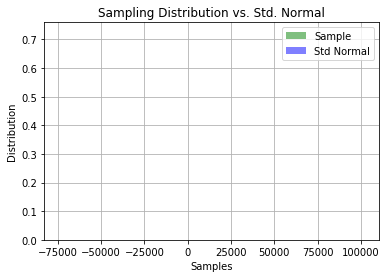

In [120]:
# Create some data and sample from it
X, y, beta_hat, beta = createData()

samples = sampleDataBootstrap(X, y)
#X_new y_new = buildNewX(X, y)
#beta_hat = 

print("Mean of the sampling distribution is: {}".format(np.mean(samples)))
print("Variance of the sampling distribution is: {}".format(np.var(samples)))
num_bins = 50
_ = plt.hist(samples - np.mean(samples), num_bins, normed=1, facecolor='green', alpha = 0.5, label='Sample')
_ = plt.hist(np.random.randn(num_samples), num_bins, normed=1, facecolor='blue', alpha=0.5, label='Std Normal')
_ = plt.xlabel('Samples')
_ = plt.ylabel('Distribution')
_ = plt.title('Sampling Distribution vs. Std. Normal')
#_ = plt.xlim([-3, 3])
#_ = plt.ylim([0, 2.2])
_ = plt.legend()
_ = plt.grid(True)

In [108]:
print(samples)

[ 3.47289266e+01  7.73472943e+00 -1.53664469e+01  1.17964794e+01
  1.06951478e+00  2.59237097e+01 -2.29046295e+00 -3.07024208e+01
  1.99963340e+01  2.38405485e+01 -8.29384338e+01  7.07083874e+01
 -1.04002054e+01  1.66979146e+01 -4.11997711e+01  1.04757257e+01
 -9.65775671e+00  2.88256347e+01  8.21690147e+01 -1.01836866e+02
  9.61787967e+00 -3.24027941e+01  1.33410573e+01  1.59194756e+01
  4.20252741e+00 -1.24014007e+01  7.83683436e+00  1.67620615e+01
 -7.13516948e-01  4.71380705e+02 -5.05823200e+00 -1.12317922e+01
  7.40394862e+02 -1.18196455e+01 -2.42896237e+01  2.65165190e+01
 -3.43490738e-01  2.55684530e+01 -4.09186471e+01  1.61259917e+01
  1.07671448e+01  2.87710704e+01  8.20107197e+00 -1.32863134e+03
 -4.86201077e+01 -3.15657039e+02  2.63567790e+01  3.44548278e+01
  1.11255694e+01 -3.19696460e+01  7.13449831e+01  1.05098530e+01
 -6.11664075e+00 -3.07763183e+00  2.72887747e+01 -3.80293968e+01
 -2.42025974e+02 -7.22774439e+00 -4.08175502e+01  1.65979230e+01
 -1.06325610e+02  1.29797